In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("battery_dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=['battery_id'])

# Handle missing values
df = df.dropna()

# Select features
X = df[['cycle', 'disI', 'disV', 'disT']]
y_rul = df['RUL']  # Target: Remaining Useful Life

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_rul, X_test_rul, y_train_rul, y_test_rul = train_test_split(X_scaled, y_rul, test_size=0.2, random_state=42)

# Train model
rul_model = LinearRegression()
rul_model.fit(X_train_rul, y_train_rul)
y_rul_pred = rul_model.predict(X_test_rul)

# Evaluation
mse_rul = mean_squared_error(y_test_rul, y_rul_pred)
r2_rul = r2_score(y_test_rul, y_rul_pred)

print(f"RUL Prediction - Mean Squared Error: {mse_rul:.4f}")
print(f"RUL Prediction - R² Score: {r2_rul:.4f}")


RUL Prediction - Mean Squared Error: 257.8286
RUL Prediction - R² Score: 0.9314


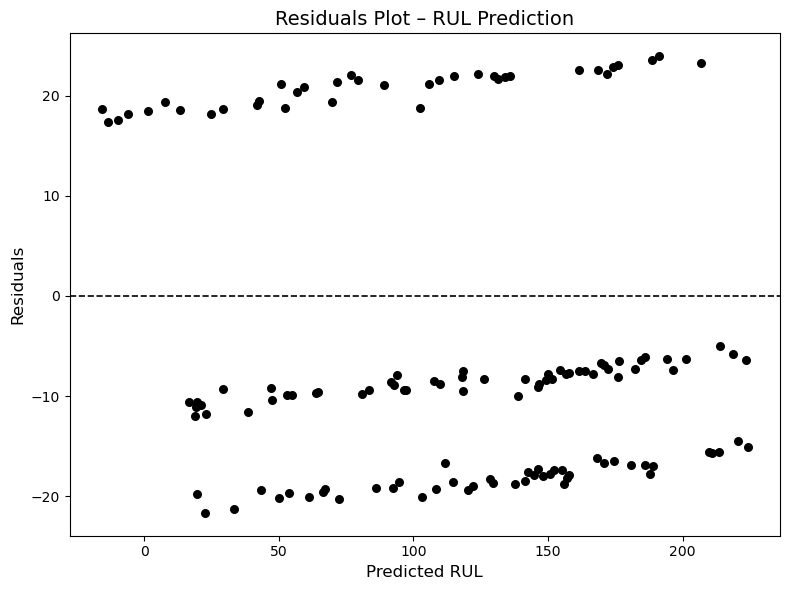

In [ ]:
# Calculate residuals
rul_residuals = y_test_rul - y_rul_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_rul_pred, rul_residuals, color='black', s=30, alpha=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1.2)
plt.xlabel('Predicted RUL', fontsize=12, color='black')
plt.ylabel('Residuals', fontsize=12, color='black')
plt.title('Residuals Plot – RUL Prediction', fontsize=14, color='black')
plt.tick_params(colors='black')
plt.grid(False)
plt.tight_layout()
plt.show()



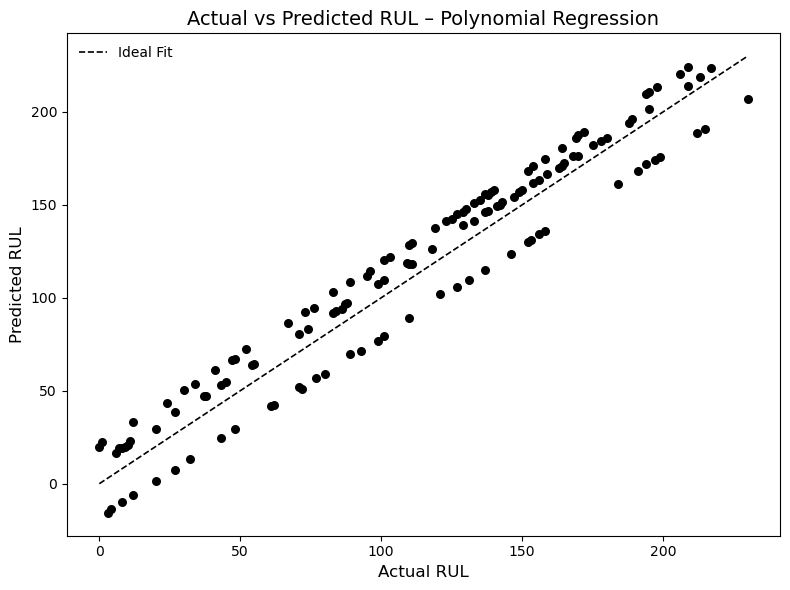

In [9]:
# Actual vs Predicted RUL (ideal line overlayed)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rul, y_rul_pred, color='black', s=30, alpha=1)
plt.plot([y_test_rul.min(), y_test_rul.max()],
         [y_test_rul.min(), y_test_rul.max()],
         color='black', linestyle='--', linewidth=1.2, label='Ideal Fit')

plt.xlabel('Actual RUL', fontsize=12, color='black')
plt.ylabel('Predicted RUL', fontsize=12, color='black')
plt.title('Actual vs Predicted RUL – Polynomial Regression', fontsize=14, color='black')
plt.tick_params(colors='black')
plt.legend(frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()
